## 남방톱날꽃게(청게)의 나이 예측 딥러닝 모델 구현 4

본 소스 파일에서는 홀드 아웃 교차 검증의 방법을 사용하여 70%의 데이터셋을 학습 데이터셋으로 사용하였고, 과적합 방지를 위해 validation_split을 이용해 학습 과정에서 loss와 val_loss를 비교하는 방법을 사용하였다. 또한, 과적합을 막기 위해 EarlyStopping() 함수를 이용하여 학습 자동 중단 과정을 설정하였다.    다중 선형 회귀 분석의 방법을 사용하여 정확도를 MAE(Mean Absolute Error)를 이용해 평가하였다.

### 1. 필요한 라이브러리 import하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager   # 한글 사용을 위해 import
import numpy as np
import tensorflow as tf

tensorflow 버전 확인하기

In [2]:
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.3.0


tensorboard import & version 확인하기

In [3]:
import tensorboard

tensorboard.__version__

'2.4.0'

### 2. 데이터셋 가져오기

상대경로를 사용하여 최종적으로 가공된 데이터셋을 가져온다.

In [4]:
filepath = "./3_Dataset.csv"

In [5]:
df = pd.read_csv(filepath)

In [6]:
df

,Length,Diameter,Height,Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,5.584852,6.747181,9,1,0,0
1,0.8875,0.6500,0.2125,5.400580,1.374951,1.559222,6,0,0,1
2,1.0375,0.7750,0.2500,7.952035,1.601747,2.764076,6,0,1,0
3,1.1750,0.8875,0.2500,13.480187,2.282135,5.244657,10,1,0,0
4,0.8875,0.6625,0.2125,6.903103,1.488349,1.700970,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3847,1.4625,1.1375,0.3250,24.819987,5.854172,6.378637,8,1,0,0
3848,1.5500,1.2125,0.4375,34.458817,7.172423,9.780577,10,1,0,0
3849,0.6250,0.4625,0.1625,2.012815,0.524466,0.637864,5,0,1,0
3850,1.0625,0.7750,0.2625,10.347568,2.338834,2.976698,6,0,1,0


### 3. 딥러닝을 위해 독립변수(x)와 종속변수(y)로 데이터 분리하기

In [7]:
#종속변수 
df_y = df['Age']
#독립변수
df_x = df.drop(['Age'], axis=1)

In [8]:
df_x.head()

,Length,Diameter,Height,Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,5.584852,6.747181,1,0,0
1,0.8875,0.6500,0.2125,5.400580,1.374951,1.559222,0,0,1
2,1.0375,0.7750,0.2500,7.952035,1.601747,2.764076,0,1,0
3,1.1750,0.8875,0.2500,13.480187,2.282135,5.244657,1,0,0
4,0.8875,0.6625,0.2125,6.903103,1.488349,1.700970,0,1,0


In [9]:
df_y.head()

0     9
1     6
2     6
3    10
4     6
Name: Age, dtype: int64

### 4. 데이터셋을 training 데이터셋과 test 데이터셋으로 분리

In [10]:
# 실행할 때마다 같은 결과를 출력하기 위해 아래처럼 설정
seed = 2  # seed 값이 같으면 똑같은 랜덤 값을 출력함
np.random.seed(seed)
tf.random.set_seed(seed)

from sklearn.model_selection import train_test_split 

In [11]:
# 트레이닝 데이터셋 : 70%, 테스트 데이터셋 : 30%
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=seed)

학습 데이터 개수와 테스트 데이터 개수 출력 

In [12]:
print( "학습 데이터 개수 : %d  ,  테스트 데이터 개수 %d  "  %(len(X_train), len(X_test)))

학습 데이터 개수 : 2696  ,  테스트 데이터 개수 1156  


In [13]:
print('-> type(X_train) : ', type(X_train))          # train_test_split( ) 함수의 return 값은 numpy.ndarray 타입
print('-> 학습 데이터 모양 : ',  np.shape(X_train))  # 학습 데이터 모양 
print('-> 학습 데이터 개수 : ', len(X_train), '개')  # 학습 데이터 개수 
print("\n학습 데이터 속성")
print(X_train)                                       # 학습 데이터 속성 확인

print('-'*90)

print('-> type(X_test) : ', type(X_test))          
print('-> 테스트 데이터 모양 : ',  np.shape(X_test)) # 테스트 데이터 모양 
print('-> 테스트 데이터 개수 : ', len(X_test), '개') # 테스트 데이터 개수 
print("\n테스트 데이터 속성")
print(X_test)                                        # 테스트 데이터 속성 확인

-> type(X_train) :  <class 'pandas.core.frame.DataFrame'>
-> 학습 데이터 모양 :  (2696, 9)
-> 학습 데이터 개수 :  2696 개

학습 데이터 속성
      Length  Diameter  Height     Weight  Viscera Weight  Shell Weight  \
530   1.4500    1.1500  0.4500  29.809499        7.356695      7.824462   
986   1.4375    1.0750  0.3875  22.552027        5.457279      6.236890   
2683  1.6750    1.3125  0.4250  39.703475        8.575724     10.971257   
1269  1.2500    1.0500  0.3375  19.178437        4.011454      5.854172   
2891  1.2625    0.9500  0.3375  19.433582        4.436697      4.564269   
...      ...       ...     ...        ...             ...           ...   
3606  1.7750    1.3875  0.4250  41.673765       10.772810     12.218635   
1608  1.3875    1.0500  0.3625  24.649890        7.299996      7.087375   
2541  0.8375    0.6500  0.2250   5.570677        1.162330      1.587572   
2575  1.4250    1.0875  0.3500  24.338046        5.556502      6.506210   
3240  0.9000    0.6625  0.2125   5.372230        1.459999

### 5. 딥러닝 모델 설계하기

딥러닝 구조를 결정(모델을 설정)

In [14]:
#keras에서 제공되는 Sequential 모델 
model = Sequential()

#1번째 층 : 입력 x는 9개, 출력은 12개, 활성화함수 relu 
model.add(Dense(12, input_dim=9, activation='relu'))

#2번째 층 : 입력 x는 12개, 출력은 9개, 활성화함수 relu 
model.add(Dense(8, activation='relu'))

#3번째 층 : 입력 x는 9개, 출력은 1개, 활성화함수 linear
model.add(Dense(1, activation='linear'))

In [15]:
model

summary() 함수로 모델 설명 보기

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


### 6. 딥러닝 모델 컴파일 및 실행하기

keras의 Sequential 모델에서 제공하는 compile() 기능으로 loss(손실 함수), optimizer(정규화기), metrics(평가지표)를 설정한다.  
mse: Mean Square Error  
adam: Adaptive moment estimation  
mae: Mean Absolute Error

In [17]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

#### 학습 조기 종료를 위한 EarlyStopping() 함수  
monitor : 관찰하고자 하는 항목  
patience : 항목에 대한 개선이 없을 때 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정  
mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정(min : 관찰 중인 항목이 감소되지 않을 때 종료)

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

validation_split : 학습시 데이터를 일부 나눠서 Validation으로 사용할 비율(과적합 방지를 위해)  
-> validation_split=0.1: 여기서는 2696개 중 10%를 Validation으로 사용하였다.  

batch_size=10로 하면 2426개의 데이터를 10개씩 처리하므로 실행 결과에서 243/243 출력   
epochs : 학습의 횟수 의미   

In [19]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
243/243 [==============================] - 0s 1ms/step - loss: 40.0896 - mae: 5.0811 - val_loss: 17.7951 - val_mae: 3.4513
Epoch 2/50
243/243 [==============================] - 0s 1ms/step - loss: 17.7297 - mae: 3.4337 - val_loss: 14.7973 - val_mae: 3.1115
Epoch 3/50
243/243 [==============================] - 0s 912us/step - loss: 14.7532 - mae: 3.0792 - val_loss: 12.2415 - val_mae: 2.7654
Epoch 4/50
243/243 [==============================] - 0s 785us/step - loss: 11.8828 - mae: 2.6722 - val_loss: 9.5862 - val_mae: 2.3843
Epoch 5/50
243/243 [==============================] - 0s 751us/step - loss: 9.1928 - mae: 2.2772 - val_loss: 7.4276 - val_mae: 2.0523
Epoch 6/50
243/243 [==============================] - 0s 837us/step - loss: 7.2577 - mae: 1.9524 - val_loss: 6.2285 - val_mae: 1.8915
Epoch 7/50
243/243 [==============================] - 0s 715us/step - loss: 6.4260 - mae: 1.8082 - val_loss: 5.8131 - val_mae: 1.8014
Epoch 8/50
243/243 [==============================] - 0s 64

#### 딥러닝 모델 학습 결과 시각화  
나는 모델이 과적합되는 것을 예방하기 위해 validation_split을 이용하여 학습 과정 중에 테스트를 실시하였다.  
아래는 모델이 훈련되는 동안 loss와 val_loss를 보여준다.  
학습을 거듭할 수록 loss와 val_loss가 줄어듦을 확인할 수 있다.  
그리고 어느 정도 학습이 이루어지면 더 이상 loss와 val_loss 값은 줄어들지 않는다. 

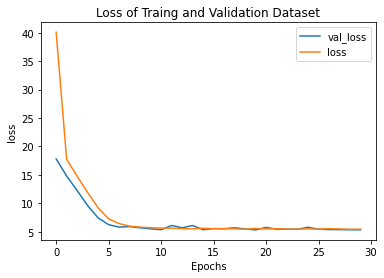

In [20]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss of Traing and Validation Dataset')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['val_loss', 'loss'])
plt.show()

### 7. 딥러닝 평가하기

#### keras의 Sequential 모델에서 제공하는 model.evaluate( ) 함수 사용
return value : [mse, mae]

In [21]:
print('-> 테스트 데이터 개수 : ', len(X_test), '개')
ev = model.evaluate(X_test, Y_test, batch_size=1)
print('-> [mse, mae] =' , ev) 

-> 테스트 데이터 개수 :  1156 개
1156/1156 [==============================] - 1s 892us/step - loss: 4.9660 - mae: 1.6213
-> [mse, mae] = [4.965987682342529, 1.621330976486206]


전체 데이터의 30%에 해당하는 1156개의 테스트 데이터셋으로 MAE() 계산 결과를 출력  
batch_size=10 : 1156개의 데이터를 10개씩 처리하므로 실행 결과에서 116/116 출력

In [22]:
print("\n MAE : %.4f" % (model.evaluate(X_test, Y_test, batch_size=10)[1])) 

116/116 [==============================] - 0s 844us/step - loss: 4.9660 - mae: 1.6213

 MAE : 1.6213


MAE 값이 1.6213가 나왔으므로 꽃게 나이 예측의 평균적인 오차값은 1.6213개월이라는 것을 알 수 있다.  

### 8. 새로운 데이터를 위의 딥러닝 모델을 사용하여 예측하기 

keras의 Sequential 모델에서 제공하는 predict() 함수를 사용  
아직 학습과 테스트에 사용하지 않은 데이터를 사용해 예측하였다.

In [23]:
# Length, Diameter, Height, Weight, Viscera Weight, Shell Weight, Sex_F, Sex_I, Sex_M
crab1 = np.array([[1.5305, 1.185, 0.4135, 24.7356155, 5.5858415, 6.749191, 1, 0, 0]])
crab2 = np.array([[0.8975,0.67,0.2305,5.50050975,1.37645075,1.5602225,0,0,1]])

test_crab1 = model.predict(crab1)
test_crab2 = model.predict(crab2)

print("crab1 나이 예측 : %.f" %test_crab1, "개월")
print("crab2 나이 예측 : %.f" %test_crab2, "개월")

crab1 나이 예측 : 11 개월
crab2 나이 예측 : 8 개월


실제 데이터를 바탕으로 만든 가상의 꽃게 데이터에서 딥러닝 모델이 꽤 정확하게 동작함을 확인할 수 있었다.  
crab1은 데이터 셋의 첫 번째 crab 데이터의 각 독립변수들을 조금씩 증가시켜 생후 11개월 정도의 crab을 만들었고, crab2는 데이터 셋의 두 번째 crab 데이터의 각 독립변수들을 조금씩 증가시켜 생후 8개월 정도의 crab을 만든 것이다.

### 9. 학습 모델 저장하기

In [24]:
model.save('CrabAge4.h5') 

### 10. 분석

이전의 모델들과 마찬가지로 꽃게 나이 예측의 평균적인 오차값이 1.6213개월인 것은 예측이 잘 되었다고 생각한다. 이는 K겹 교차 검증 방식을 사용한 모델 2와 모델 3과 비슷한 수치이다. 그러나 처음 만든 홀드 아웃 교차 검증을 사용한 딥러닝 모델 1(오차: 1.5869개월)에 비해서 오차값이 크다는 점에서 좋지 않은 방법이라는 것을 알 수 있었다. 이는 모델이 과적합되는 것을 예방하기 위해 validation_split을 이용하여 학습 과정 중에 테스트를 실시한 것이 오히려 언더피팅을 일으켰다고 생각한다. 그 이유는 validation_split의 값을 0.1로 설정하여 훈련 데이터셋의 10%의 손실이 발생하였고 훈련 데이터가 불충분하여 테스트 데이터셋에서 좋지 않은 성과를 보여주었기 때문이다. 결론적으로 성능이나 학습 시간에서 모두 모델 1이 가장 우수하다는 결과가 나왔다.  